# Unsupervised algorithms

**In this practical session you will:**

   - Learn to use several common unsupervised methods (dimensionality reduction and clustering algotithms) used in multi-omics data analysis.
   - Explore part of the multi-omics dataset and discover the underlying structure of the trasncriptomic data.

## Dimensionality reduction methods

Dimensionality reduction algorithms are techniques used to reduce the number of features (or dimensions) in a dataset while preserving its essential information: this is particularly useful for **visualization, meaningful compression and discovery of the underlying structure of the data**. Two popular dimensionality reduction algorithms are Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

### Principal Component Analysis (PCA):

PCA is a statistical technique that on an n-dimensional matrix of values that:

- Identifies the directions (specific axis in the matrix) at which, if the rest of the data is projected into, the data varies the most: the principal components.

- Represents the data in a new coordinate system defined by these principal components.
    
Therefore, the key idea is to find a lower-dimensional representation of the data that captures the maximum amount of variance. Hence, the first principal component is the one that captures the most significant amount of variance in the data, followed by the second principal component, and so on.

To achieve this, the algorithm follows these steps:

1. PCA starts by computing the **covariance matrix** of the original data, which represents the relationships between the different features.

2. **Eigenvectors and eigenvalues** are extracted from the covariance matrix. The **eigenvectors** are the principal components and the **eigenvalues** indicate the variance along each principal component.

3. The **eigenvectors** are sorted in descending order based on the **eigenvalues**.

4. The dimensionality of the data is reduced and the data is transformed **linearly** into a new coordinate system aligned with the an amount of first principal components depending on the new dimensionality.

<!-- Add an empty line here -->

[![PCA in a nutshell](https://pbs.twimg.com/media/F9XIOm1boAEhsL2?format=jpg&name=small)](https://twitter.com/akshay_pachaar/status/1717519050706952695)

<!-- Add an empty line here -->

PCA is probably the most used dimensionality reduction technique thanks to its multiple advantatges, although it also has its own problems:

**Advantages:**
- Computationally efficient for linear dimensionality reduction.
- Preserves as much variance as possible.
- Clear interpretation of the principal components.

**Disadvantages:**
- Assumes linearity.
- May not capture complex nonlinear relationships.

### t-Distributed Stochastic Neighbor Embedding (t-SNE):

t-SNE is another common dimensionality reduction algorithm primarily used for visualizing high-dimensional data in a lower-dimensional space. However, unlike linear methods like PCA, t-SNE focuses on preserving local structures and capturing non-linear relationships between data points.

To this effect, the algorithm uses:

- **Measures of pairwise similarity** between data points since similar data points in the high-dimensional space are intended to remain close to each other in the low-dimensional space.

- Moreover, t-SNE constructs **probability distributions** for the pairwise similarities in both the high-dimensional and low-dimensional spaces to model the similarities using conditional probabilities.

- The algorithm minimizes the **divergence between the probability distributions** in the high-dimensional and low-dimensional spaces low-dimensional representation to reflect the structure of the high-dimensional data.

<!-- Add an empty line here -->

Following this criteria and statistical tools, the steps of the algorithm are:

1. **Compute Pairwise Similarities:** For each pair of data points in the high-dimensional space the pairwise similarity is computed.

2. **Construct Probability Distributions:** The pairwise similarities are converted into probability distributions. In the high-dimensional space a Gaussian distribution is used to represent the similarities while in the low-dimensional space is a Student's t-distribution (this distribution has heavier tails compared to the Gaussian making it more flexible and better suited for capturing local structures).

3. **Minimize the Divergence:** The Kullback-Leibler divergence is minimized between the two sets of probability distributions by iteratively adjusting the positions of data points in the low-dimensional space. Once the minimum is achieved, the final output is the resulting low-dimensional embedding of the data.

<!-- Add an empty line here -->

The advantatges and disadvantatges of t-SNE remark the complementarity of this technique to PCA:

**Advantages:**
- Effective for preserving local structure and capturing non-linear relationships.
- Well-suited for visualization of high-dimensional data.

**Disadvantages:**
- Computationally expensive for large datasets.
- Optimizing t-SNE involves non-convex optimization, which may result in different solutions for different initializations.

### PCA or t-SNE?

The different characteristics of these techniques is key to choose the appropiate one based on the nature of the data and the problem at hand: PCA is often preferred for linear relationships and dimensionality reduction, while t-SNE is powerful for visualizing complex, non-linear structures in high-dimensional data.

**Linearity vs. Non-Linearity:**
- PCA: Assumes linear relationships.
- t-SNE: Captures non-linear relationships.

**Preservation of Global vs. Local Structure:**
- PCA: Emphasizes preserving global variance.
- t-SNE: Focuses on preserving local structures and similarities.

**Interpretability:**
- PCA: Principal components have a clear interpretation.
- t-SNE: The mapping is more difficult to interpret, especially for distances in the high-dimensional space.

**Computational Complexity:**
- PCA: Computationally efficient.
- t-SNE: Computationally expensive, especially for large datasets.

## Clustering algorithms

Clustering algorithms are used to group data points together into clusters based on their relation to surrounding data points. Hence, they use similarity or distance measures in the feature space in an effort to discover dense regions of data points (hence, it is good practice to scale data prior to using clustering algorithms).

There are many types of clustering algorithms but they have in common an iterative process identified clusters are evaluated and reported back to the algorithm configuration until the desired or appropriate number of clusters is achieved.

Therefore, some clustering algorithms require the user to specify the number of clusters to discover in the data while others require only some minimum distance between observations, a theshold at which data points might be considered as "close" or "connected".

### Hierarchical Clustering:

Hierarchical clustering generates a tree-like hierarchy of clusters known as a dendrogram through the iterative process. It does not require to specify the number of clusters beforehand but the user should subjectively define a posteriori the amount of clusters based on the dendogram. The iterative steps are the following:

1. **Evaluate the distance between clusters** The algorithm computes the pairwise distance between all the clusters at the iteration (the algorithm starts by considering each data point as an individual cluster and ends when all data points are assigned to one cluster).

2. **Merge the closest clusters**: The two clusters with the lowest distance between them are merged toghether into a new cluster. This distance is recorded on the dendogram as the length of the branch between the original two clusters and the new cluster (a new node in the dendogram). The algorith enters into the next iteration.


<!-- Add an empty line here -->

[![Hierarchical clustering](https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/images/optimized/rev-6132d4f/www.displayr.com/wp-content/uploads/2018/03/Hierarchical-clustering-3-1.png)](https://www.displayr.com/what-is-hierarchical-clustering/)

<!-- Add an empty line here -->

Once the dendogram is generated, the shape could be interpreted to define the amount of desired clusters. Together with visual inspection and several performance metrics, such as the **Cophenetic Correlation Coefficient** that measures how faithfully the hierarchical clustering preserves pairwise distances between data points (close to 1 indicates good clustering) or the **Ward's method** (see below), it allows to evaluate how succesful the clustering has been.

<!-- Add an empty line here -->

[![Dendogram](https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/images/optimized/rev-6132d4f/www.displayr.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png)](https://www.displayr.com/what-is-hierarchical-clustering/)

<!-- Add an empty line here -->

There are various linkage methods, that is, methods to measure the distance between clusters, where each one of them has the advantatge to proficiently detect specific shapes of clusters or the disadvantatge of be misguided by data with a different nature. Some examples are:

- **Single linkage**: The distance is computed as the closest between two points such that one point lies in one cluster and the other point lies in the other. This method is able to separate non-elliptical shapes as long as the gap between the two clusters is not small, however, it has bad performance when there is noise between clusters.

- **Complete linkage**: The distance is computed as the furthest between two points such that one point lies in one cluster and the other point lies in the other. In contrast, this method has a good performance when there is noise between clusters but is biased towards detecting globular clusters and tends to disgregate the large clusters.

- **Average linkage**: The distance is computed as the average between all possible pairs of data points between clusters. Similar to the complete linkage, has a good performance with noise between clusters but is biased towards globular ones.

- **Ward's method**: It is similar to the average linkage, but the average is computed over the sum of the square of pair-wise distances. The ward's method also serves as a performance metric where low values within each cluster suggest better performance.

<!-- Add an empty line here -->

[![Likage methods](https://miro.medium.com/v2/resize:fit:640/format:webp/0*s2KrCgCQIlEqcK_X)](https://medium.com/@u0808b100/unsupervised-learning-in-python-hierarchical-clustering-t-sne-41f17bbbd350)

<!-- Add an empty line here -->

With respect to other clustering algotithms, the hierarchical clustering presents:

**Advantages:**
- No need to pre-specify the number of clusters.
- Provides a hierarchical structure.

**Disadvantages:**
- Computationally expensive, especially for large datasets.
- Difficult to determine the optimal number of clusters (highly subjective).

### K-Means Clustering:

K-Means clustering partitions the data into a predefined k number of clusters, where each cluster is defined by a centroid: a data point calculated as the mean of all the data points in the cluster. There are different algorithms, but all of them use an iterative procedure until a convergence solution is achieved. Roughly, they follow these two steps:

1. **Assignment**: Each data point is assigned to the nearest centroid, generating K clusters at the current iteration. At the first iteration, the k initial cluster centroids are choosen at random in the space.

2. **Update the centroids**: The k-centroids are recalculated based on the mean of the data points in each cluster. If after updating several times the data points on each cluster remain the same after assigment, the centroids remain the same after the update: convergence has been achieved and the algorithm stops.

<!-- Add an empty line here -->

<a href="https://stackoverflow.com/questions/60312401/when-using-the-k-means-clustering-algorithm-is-it-possible-to-have-a-set-of-dat" target="_blank">
  <img src="https://i.stack.imgur.com/ibYKU.png" alt="K-means clustering" width="800"/>
</a>

<!-- Add an empty line here -->

Similar to hierarchical clustering, there are some metrics that reflect performance such as the **silhouette score**, which evaluates the intra-cluster compactness and between clusters separation or the **Ward's method**. Despite being unsupervised methods, if there is any information about the "true" clusters in the data, one can compute the **Adjusted Rand Index (ARI)** which measures the similarity between true and predicted clusters, adjusted for chance.

With respect to advantages and disadvantages compared to other clustering methods:

**Advantages**:
- Efficient and works well with large datasets.
- Simple and easy to implement.

<!-- Add an empty line here -->

**Disadvantages**:
- Sensitive to initial centroid placement.
- Assumes clusters are spherical and equally sized.

### Hierarchical o K-Means Clustering?

As always, depends on the nature of the data and the goals of the analysis. Hierarchical does not require to specify the initial number of clusters and decision can be done a posteriori evaluating the hierarchy, however it is computationally expensive. K-means clustering is more efficient, but requires a predefined expected number of clusters and is very sensitive to initializations.

## Practical session: visualization of transcriptomes and identification of cancer types by expression

The expression data across genes and specimens that we generated in the previous session is highly multidimensional, given that for each specimen we have the expression across more than 20000 thousand genes or features.

In order to make any sense of this data, we can start by employing techniques such as PCA or t-SNE to preliminary investigate for interesting patterns in the data. For this purpose we can use the utilities available on the scikit-learn package.

### PCA

From a practical point of view, these are the steps we are going to implement:

1. Standardize the data: The objetive of PCA is to maximize the variance. If the features (in this case >20000 gene expressions have different scales or units, it is important to standardize the data by subtracting the mean and dividing by the standard deviation. This step ensures that all features are on a similar scale and prevents dominance by features with larger variances. For that, we will use the StandardScaler of sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

2. Compute the covariance matrix: To understand the relationships between pairs of gene expression in the data.

3. Perform the eigen-decomposition: The covariance matrix is decomposed into its eigenvectors and eigenvalues. The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance explained by each principal component.

4. Select the principal components: The principal components are ranked based on their corresponding eigenvalues, and the top components capturing the most variance are selected. Since we will do a 2D visualization, we need the two components that explain most of the variance in gene expression across samples.

5. Project the data onto the new coordinate system: The original data is transformed by projecting it onto the selected principal components. Each data point is represented by its new coordinates in the principal component space.

Steps 2, 3, 4 and 5 could be implemented easily with numpy through linear algebra operations (if anyones wants to, you can try the exercise. If you need help, see https://stackoverflow.com/questions/58666635/implementing-pca-with-numpy) however, this is a standard procedure and already implemented in machine learning packages such as **skicit-learn** as the PCA module.

[0.11649377 0.0619172 ]


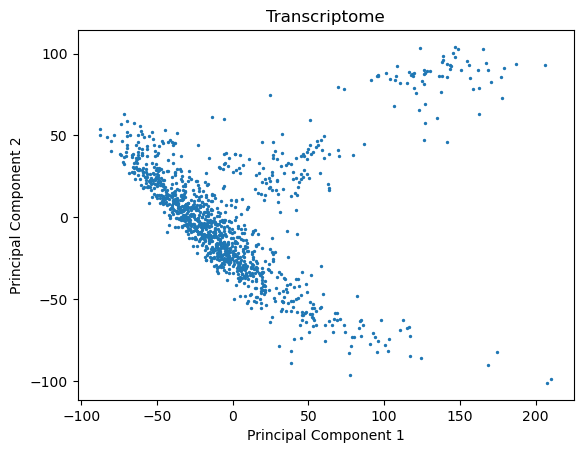

In [1]:
import pandas as pd
import numpy as np
from os import path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# To ignore some plot warnings
import warnings
warnings.filterwarnings('ignore')

n_components = 2

# We load the expression data
expression_df = pd.read_csv(path.join('data', 'gene_expression.tsv.gz'),
                                                        sep="\t", header='infer', index_col=0, compression='gzip')

# We preprocess the data with standarization
scaler = StandardScaler()
data = scaler.fit_transform(expression_df.T)

# We perform the PCA
pca2D = PCA(n_components=n_components)
proj_data = pca2D.fit_transform(data)

# We can check the amount of variance explained by the two Principcal components
print(pca2D.explained_variance_ratio_)

# We plot the data (the first two components are the first two columns of proj_data)
scatter = plt.scatter(proj_data[:,0], proj_data[:,1], s=2)  # Adjust the 's' parameter to control the size
plt.title('Transcriptome')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

[0.11649377 0.0619172  0.04231396]


Text(0.5, 0.92, 'Transcriptome')

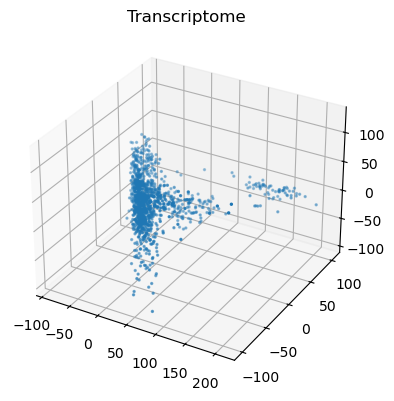

In [2]:
# We can even use the third PC and do a 3D plot
n_components = 3
# We perform the PCA
pca3D = PCA(n_components=n_components)
proj_data3D = pca3D.fit_transform(data)

print(pca3D.explained_variance_ratio_)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(proj_data3D[:,0],
              proj_data3D[:,1],
              proj_data3D[:,2], s=2)
ax.set_title("Transcriptome")

A priori we cannot distinguish much, but we could try to colour each sample based on the primary tumor type and see if it is more informative.

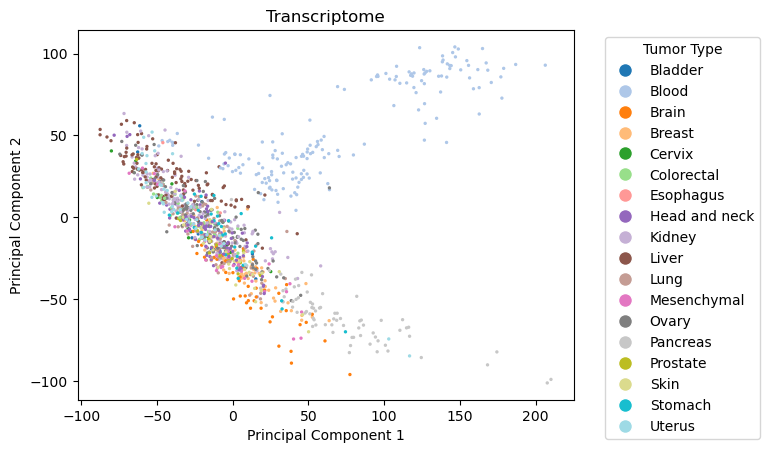

In [3]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# Get sample dataframe with the information
sample_df = pd.read_csv(path.join('data', 'sample_df.tsv'), sep="\t", header='infer')

# Generate a dictionary to translate the Specimen IDs to the tumor type code.
tumortype_dict = dict(zip(sample_df.icgc_specimen_id, sample_df.primary_location))

# Get the tumor type for each sample (each column)
labels = expression_df.columns.map(tumortype_dict)

# Automatically create a mapping from label categories to integers
unique_labels = np.unique(labels)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

# Convert labels to integers based on the automatic mapping
label_integers = np.array([label_mapping[label] for label in labels])

# Automatically generate a ListedColormap with unique colors based on the number of labels
num_colors = len(unique_labels)
color_map = plt.get_cmap('tab20', num_colors)  # Replace 'viridis' with any other colormap of your choice

# Create a ListedColormap with unique colors
listed_color_map = ListedColormap([color_map(idx) for idx in range(num_colors)])

# Plot with colours 
# We plot the data (the first two components are the first two columns of proj_data)
scatter = plt.scatter(proj_data[:,0], proj_data[:,1], s=2, c=label_integers, cmap=listed_color_map)

# Create legend handles and labels
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(idx), markersize=10, label=label)
                  for idx, label in enumerate(unique_labels)]

# Add legend
plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Transcriptome')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save image
plt.savefig(path.join('plots', 'PCA.png'))
plt.show()

Apparently the PCA can separate some blood cancer clusters, but has problems to separate other samples from a wide variety of primary tumor locations. Definetly, the implementation of PCA does not solve the problem at hand.

### t-SNE

t-SNE does not assume linearity and might be a better proxy to separate the different types of tumors.

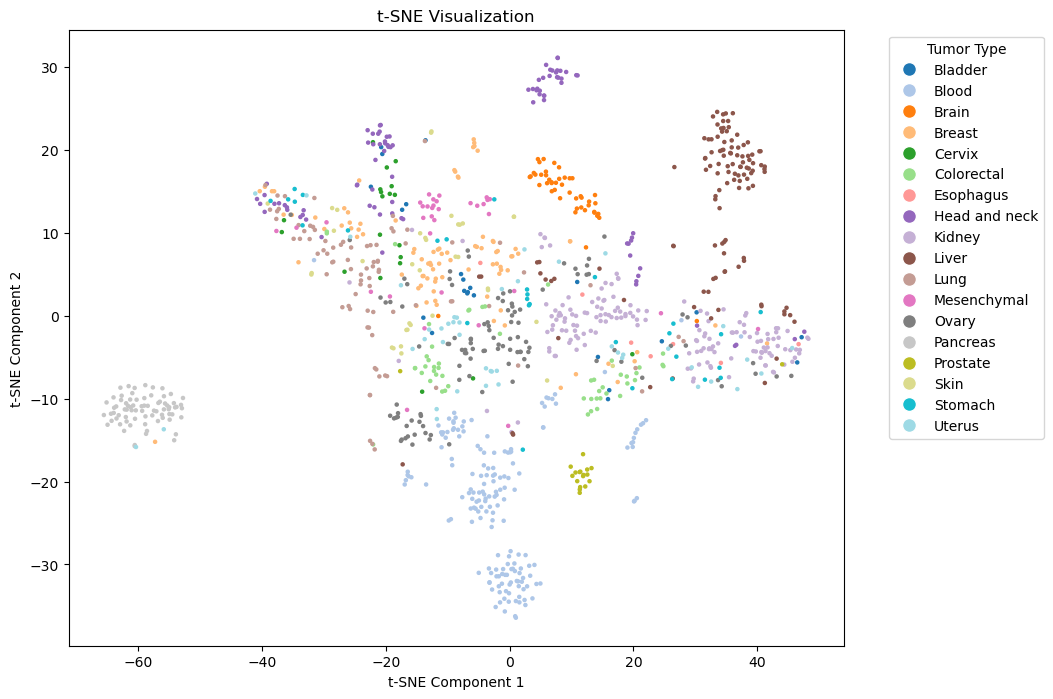

In [4]:
from sklearn.manifold import TSNE

# Transpose the matrix
transposed_matrix = expression_df.to_numpy().T

# Initialize TSNE with 2 components for 2D visualization)\
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_result = tsne.fit_transform(transposed_matrix)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

# Finally, plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], s=5, c=label_integers, cmap=listed_color_map)

# Add legend
plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Save the figure
plt.savefig(path.join('plots', 'tSNE.png'))
plt.show()

This non-linear transformation that t-SNE uses for reducing the dimensionality allows for a better differentiation of specific groups, namely the pancreas tumors, prostate, brain and some kidney cancers. Other types of tumors are not so clearly differentiated although they tend to be together. Within primary cancer types there is also variability, for instance multiple types of blood cancers tend to show subclusters (similarly colorectal tumors and others).

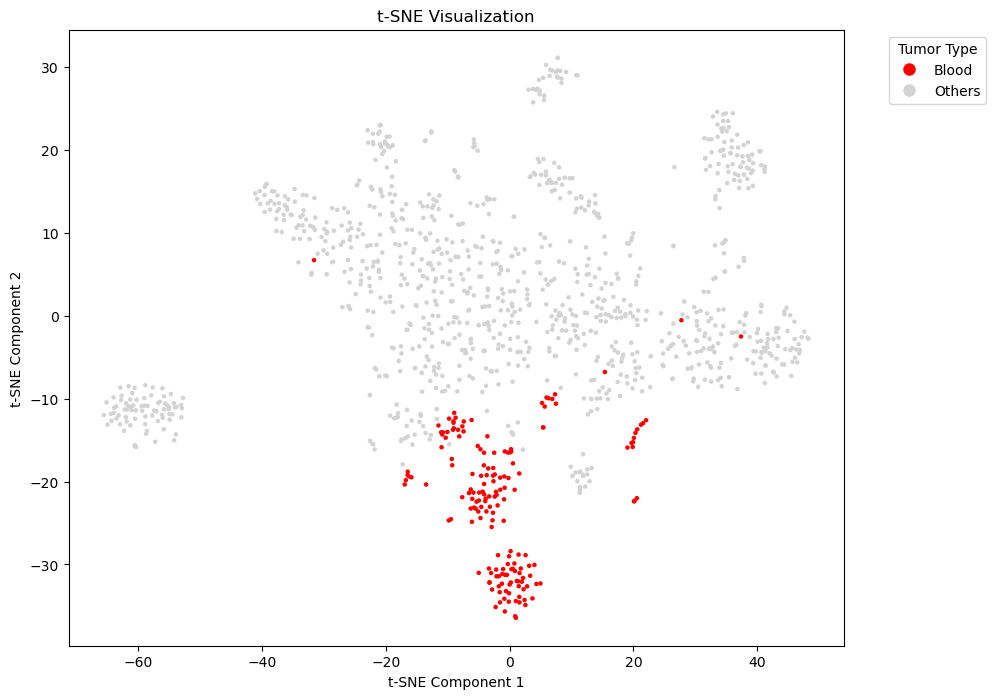

In [5]:
# Generate a binary category
binary_blood = pd.Series(labels).apply(lambda x: 'Blood' if x == 'Blood' else 'Others')

# Automatically create a mapping from label categories to integers
unique_labels = np.unique(binary_blood)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

# Convert labels to integers based on the automatic mapping
label_integers = np.array([label_mapping[label] for label in binary_blood])

color_map = ListedColormap(['red', 'lightgrey',])

# Finally, plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], s=5, c=label_integers, cmap=color_map)

# Create legend handles and labels
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(idx), markersize=10, label=label)
                  for idx, label in enumerate(unique_labels)]

# Add legend
plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Save the figure
plt.savefig(path.join('plots', 'tSNE_blood.png'))
plt.show()

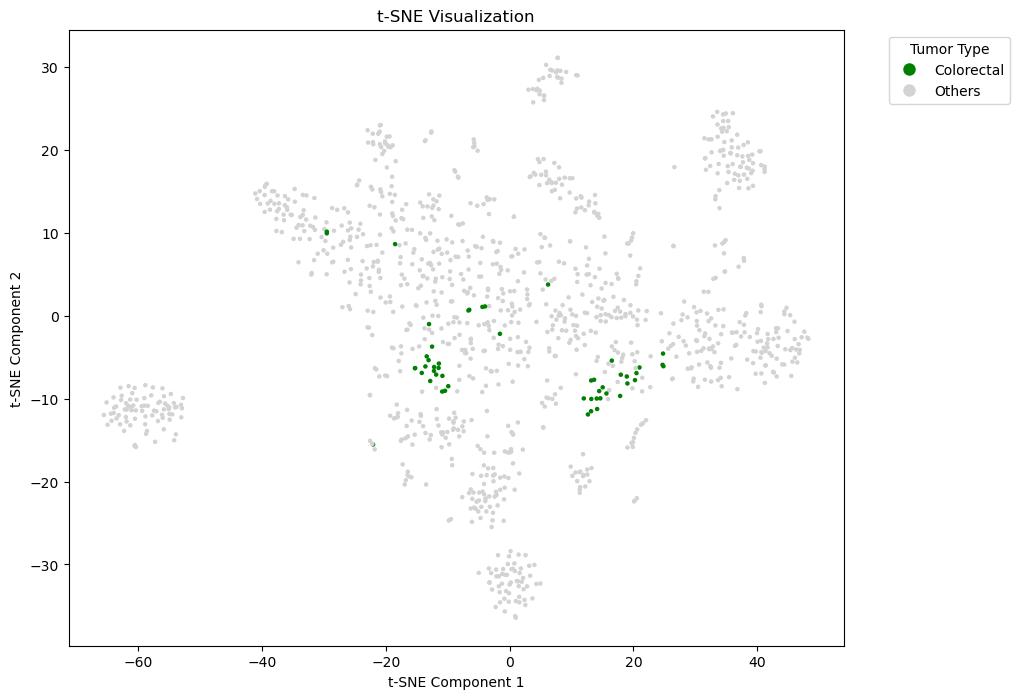

In [6]:
# Generate a binary category
binary_colorectal = pd.Series(labels).apply(lambda x: 'Colorectal' if x == 'Colorectal' else 'Others')

# Automatically create a mapping from label categories to integers
unique_labels = np.unique(binary_colorectal)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

# Convert labels to integers based on the automatic mapping
label_integers = np.array([label_mapping[label] for label in binary_colorectal])

color_map = ListedColormap(['green', 'lightgrey',])

# Finally, plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], s=5, c=label_integers, cmap=color_map)

# Create legend handles and labels
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(idx), markersize=10, label=label)
                  for idx, label in enumerate(unique_labels)]

# Add legend
plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Save the figure
plt.savefig(path.join('plots', 'tSNE_colorectal.png'))
plt.show()

### Hierarchical clustering

A priori we do not have any preliminary information like the primary types, but we can try to extract clusters directly from the t-SNE output. This is not devoid of interpretation problems (https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne), so well-differentiated clusters might not show real biological features that differentiate them.

For starters let's assume that we do not know the underlying structure of primary types and try to extract 18 clusters.

Cophenetic correlation coefficient: 0.631515744287108
Silhouette Score: 0.4520081877708435


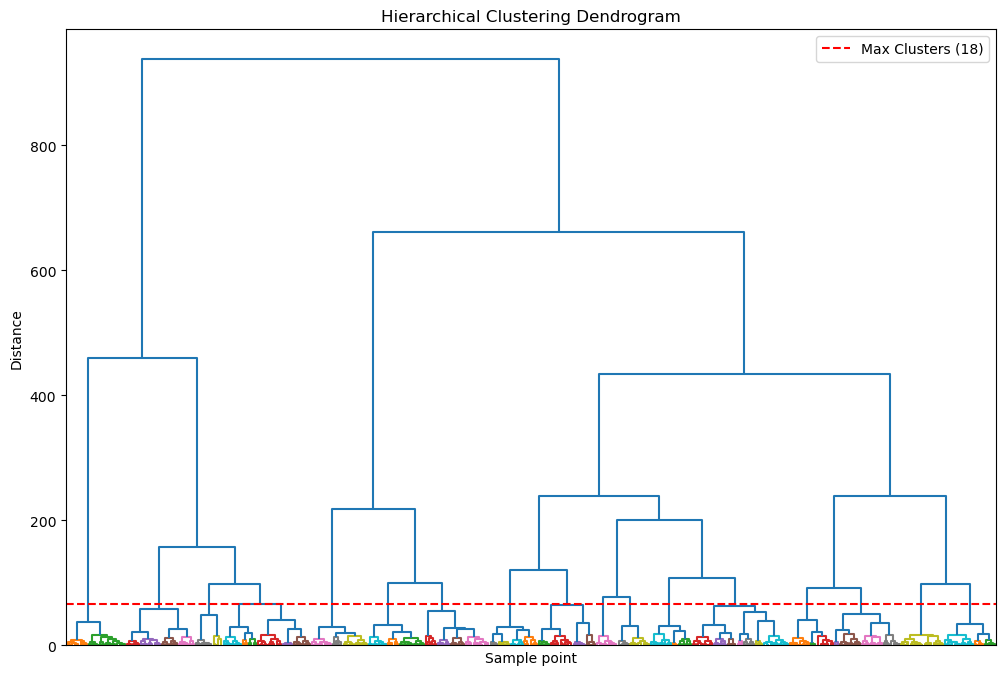

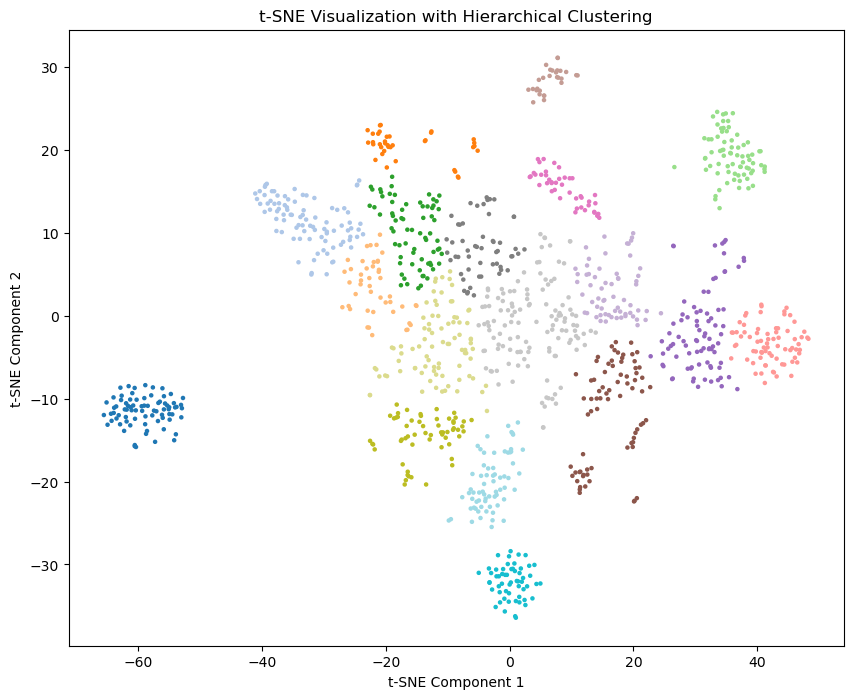

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

# Apply hierarchical clustering
linkage_matrix = linkage(tsne_result, method='ward')

# Compute cophenetic correlation (Ward's metric)
c, coph_dists = cophenet(linkage_matrix, pdist(tsne_result))
print(f"Cophenetic correlation coefficient: {c}")

# Set the number of clusters using maxclust
num_clusters = 18

# Assign cluster labels based on the maxclust criterion
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Get the threshold distance used for clustering
threshold_distance = linkage_matrix[-(num_clusters - 1), 2]

# Compute silhouette score
silhouette_avg = silhouette_score(tsne_result, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the dendrogram with a horizontal line at the threshold
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., color_threshold=num_clusters)
plt.xticks([]) # Remove x-axis labels
plt.axhline(y=threshold_distance, color='r', linestyle='--', label=f'Max Clusters ({num_clusters})')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample point')
plt.ylabel('Distance')
plt.legend()

# Save the plot
plt.savefig(path.join('plots', 'HierarchClust_dendogram.png'))
plt.show()

# Plot the t-SNE results with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=clusters, cmap='tab20', s=5)
plt.title('t-SNE Visualization with Hierarchical Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Save the plot
plt.savefig(path.join('plots', 'tSNE_HierarchClust.png'))
plt.show()

The red dashed line on the dendogram marks the threshold of ward's distance that has been used to define 18 clusters. How good is the clustering then?

From a strictly geometric point of view, the **Cophenetic Correlation Coefficient (or Ward's method)**, which measures how faithfully the hierarchy preserves the pairwise distances between the original data points, shows a moderate level of fidelity (this metric ranges from -1 to 1, where higher values indicate better preservation). Moreover, the **Silhouette Score**, which measures cohesion of the clusters and also ranges from -1 to 1 with higher values indicating cohesed clusters, reflects a rather mid cohesion. However, these metrics do not have any value unless interpreted under the light of the nature of the data.  

Some clusters are clearly defined, and we know that reflect real expression pattern differences due to primary type location and even tumor subtypes (different blood cancers show different clusters that, in reality, reflect different types of tumors). However, on the center of the t-SNE plot there are some clusters that were extracted from groups of points with not so clear distinction between them. Here the expression patterns are not enough different to distinguish clear subdivisions and might not reflect any biological feature (at least it does not reflect the primary type location). We can make this interpretation thanks to external information about tumor type, but as an unsupervised method this is not implemented on its methodology.

We can play with the dendogram to define other numbers of clusters (independently of this 18 clusters value we obtain from external information) or use the primary type external information to compute the **Adjusted Rand Index (ARI)** as a proxy of performance of the clustering algorithm.

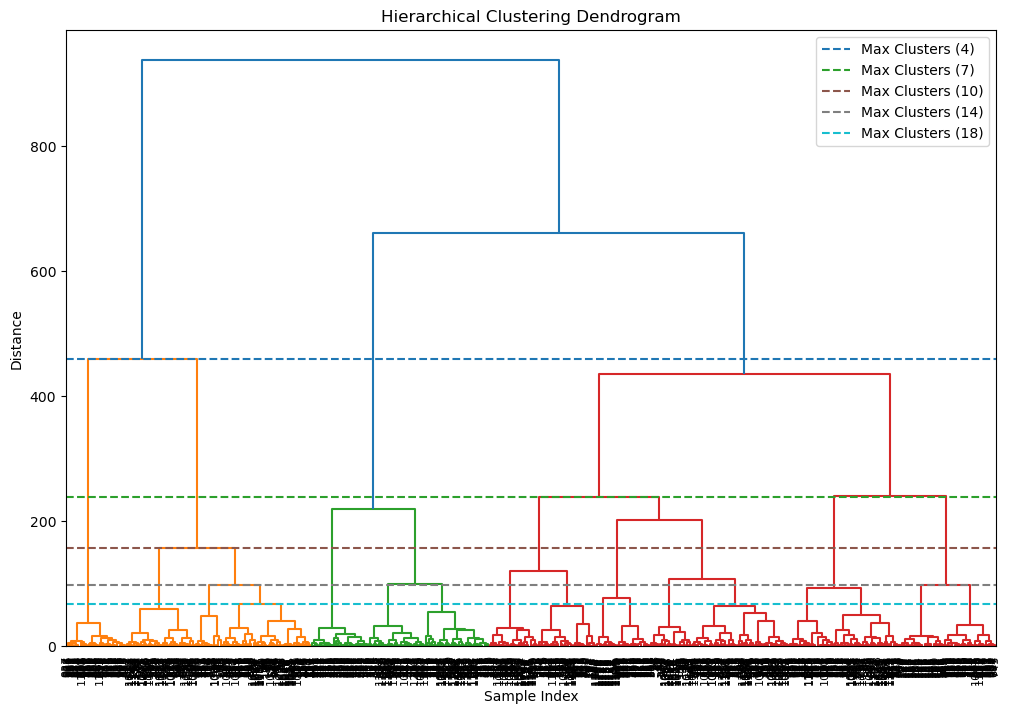

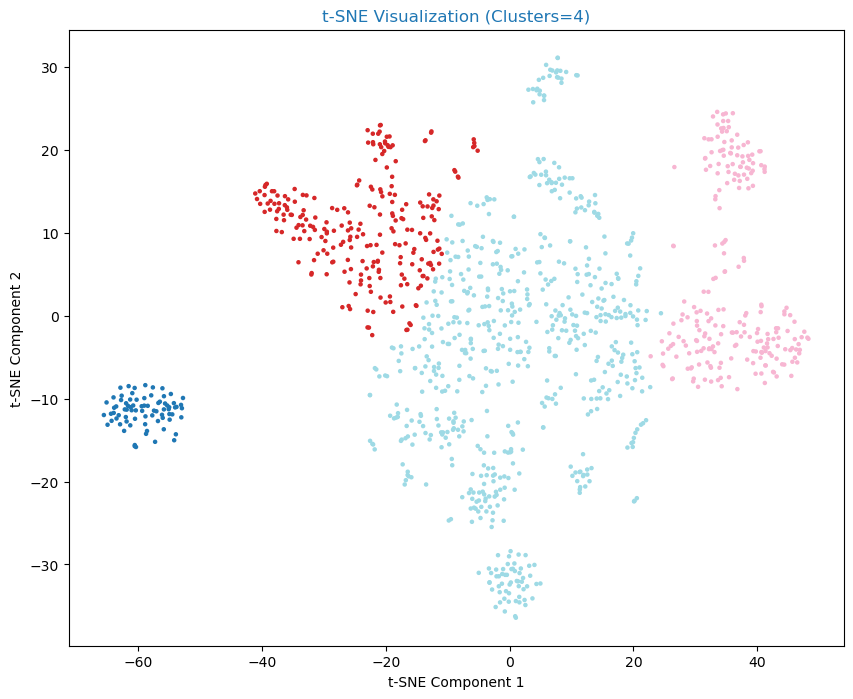

Adjusted Rand Index (ARI) for Clusters=4: -0.0307



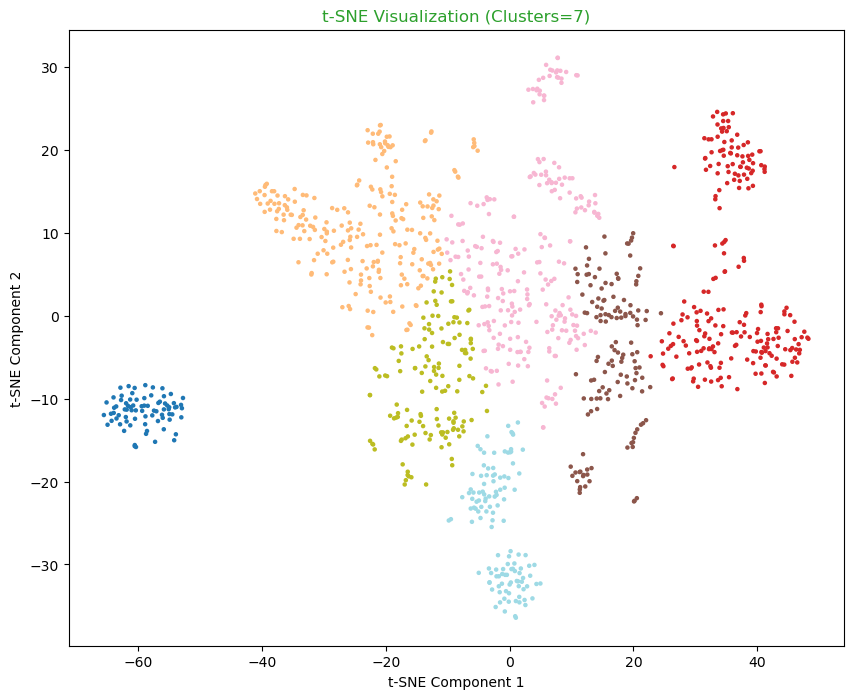

Adjusted Rand Index (ARI) for Clusters=7: 0.0075



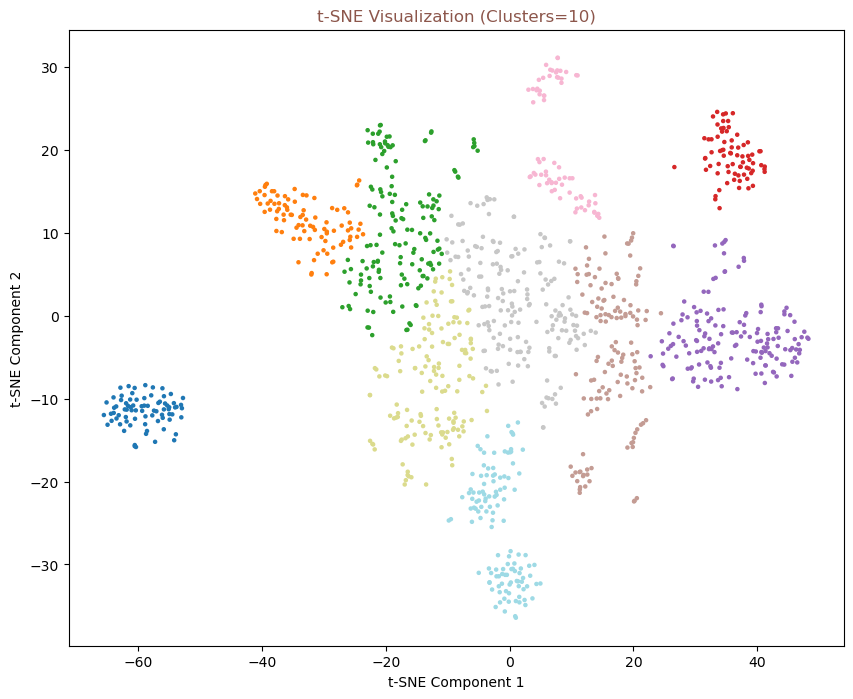

Adjusted Rand Index (ARI) for Clusters=10: -0.0001



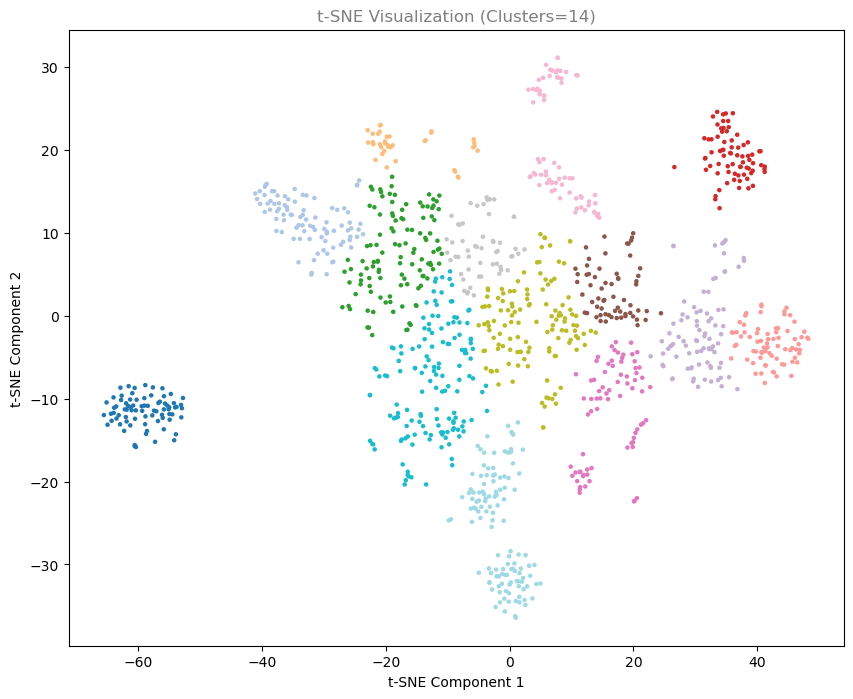

Adjusted Rand Index (ARI) for Clusters=14: -0.0002



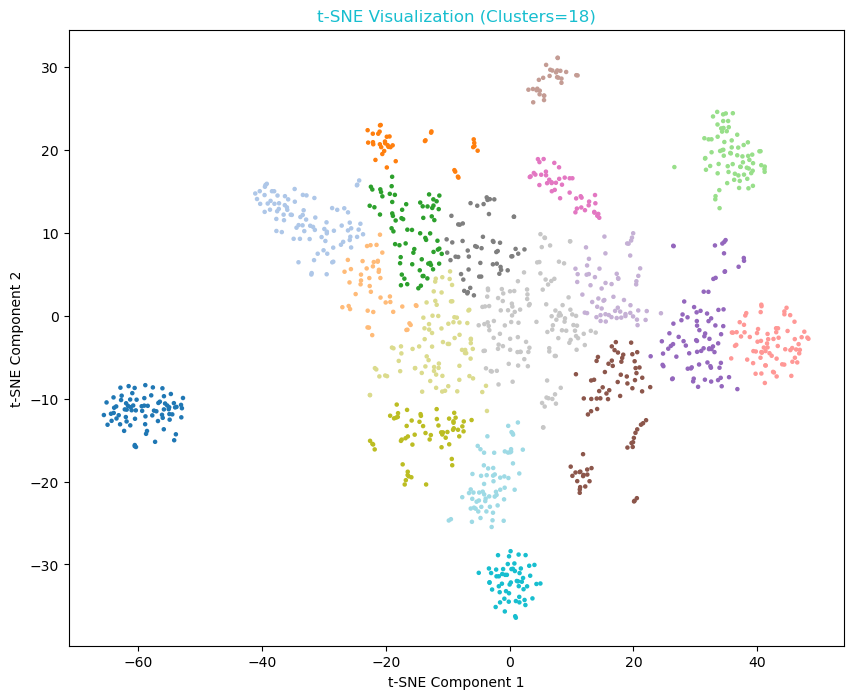

Adjusted Rand Index (ARI) for Clusters=18: 0.0004



In [8]:
from matplotlib.colors import to_hex
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Function to calculate and plot hierarchical clustering
def hierarchical_clustering_and_tsne(tsne_result, true_labels, num_clusters_list, method):
    
    # Get the colours for the threshold
    color_map = plt.get_cmap('tab10', len(num_clusters_list))
    
    # Apply hierarchical clustering
    linkage_matrix = linkage(tsne_result, method=method)
    
    # Plot dendrogram and t-SNE for different numbers of clusters
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
    plt.title(f'Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    
    all_clusters = list()
    for i, num_clusters in enumerate(num_clusters_list):
        
        # Assign cluster labels based on the maxclust criterion
        clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
        all_clusters.append(clusters)
    
        # Get the threshold distance used for clustering
        threshold_distance = linkage_matrix[-(num_clusters - 1), 2]
        plt.axhline(y=threshold_distance, color=to_hex(color_map.colors[i]), linestyle='--', label=f'Max Clusters ({num_clusters})')
    
    plt.legend()
    plt.show()
    
    for i, clusters in enumerate(all_clusters):

        # Plot the t-SNE results with cluster colors
        plt.figure(figsize=(10, 8))
        plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=clusters, cmap='tab20', s=5)
        plt.title(f't-SNE Visualization (Clusters={num_clusters_list[i]})', color=to_hex(color_map.colors[i]))
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.show()

        # Calculate Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(true_labels, clusters)
        print(f'Adjusted Rand Index (ARI) for Clusters={num_clusters_list[i]}: {ari:.4f}\n')


# List of different numbers of clusters to try
num_clusters_list = [4, 7, 10, 14, 18]

# Also we can try different methods by changing this parameter
method = 'ward' 

# Call the function to perform hierarchical clustering and t-SNE for each number of clusters
hierarchical_clustering_and_tsne(tsne_result, label_integers, num_clusters_list, method)

As shown in the plot, the Adjusted Rand Index is higher using 14 clusters, less than the 18. Note on the code that it is possible to change the linkage metric to another different than the **ward's method**. Feel free to experiment with other methodologies such as the **minimum** (also named single method), the **maximum** (or complete), ... The different values that the method parameter can take for the linkage function are collected in the scipy documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

### K-means clustering

Similar to hierarchical clustering, we can use k-means clustering to extract plots from the t-SNE results using the following code.

In [9]:
from sklearn.cluster import KMeans

# Function to calculate and plot k-means clustering
def kmeans_clustering_and_tsne(tsne_result, true_labels, num_clusters_list, random_seed=42):

    all_clusters = list()
    for num_clusters in num_clusters_list:
        
        # Apply k-means clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=random_seed, n_init='auto')
        clusters = kmeans.fit_predict(tsne_result)
        all_clusters.append(clusters)
    
        # Plot the t-SNE results with cluster colors
        plt.figure(figsize=(10, 8))
        plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=clusters, cmap='tab20', s=5)
        plt.title(f't-SNE Visualization (Clusters={num_clusters})')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.show()

        # Calculate Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(true_labels, clusters)
        print(f'Adjusted Rand Index (ARI) for Clusters={num_clusters}: {ari:.4f}\n')

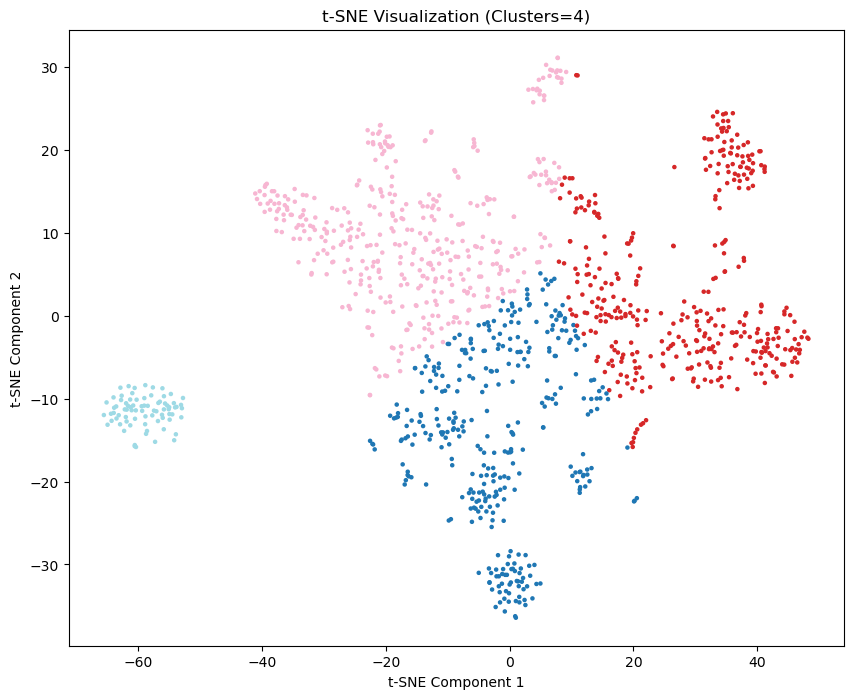

Adjusted Rand Index (ARI) for Clusters=4: 0.0001



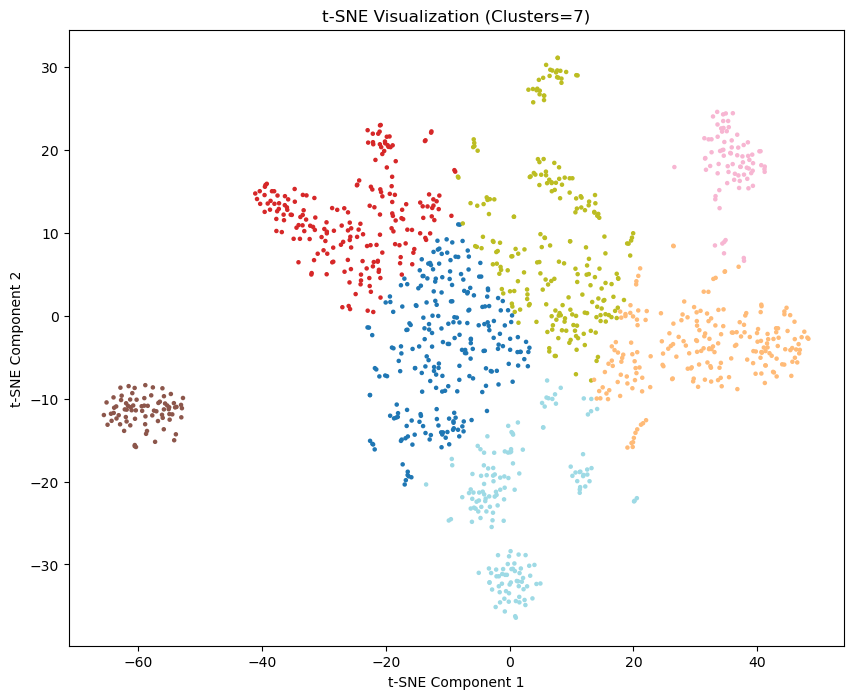

Adjusted Rand Index (ARI) for Clusters=7: -0.0032



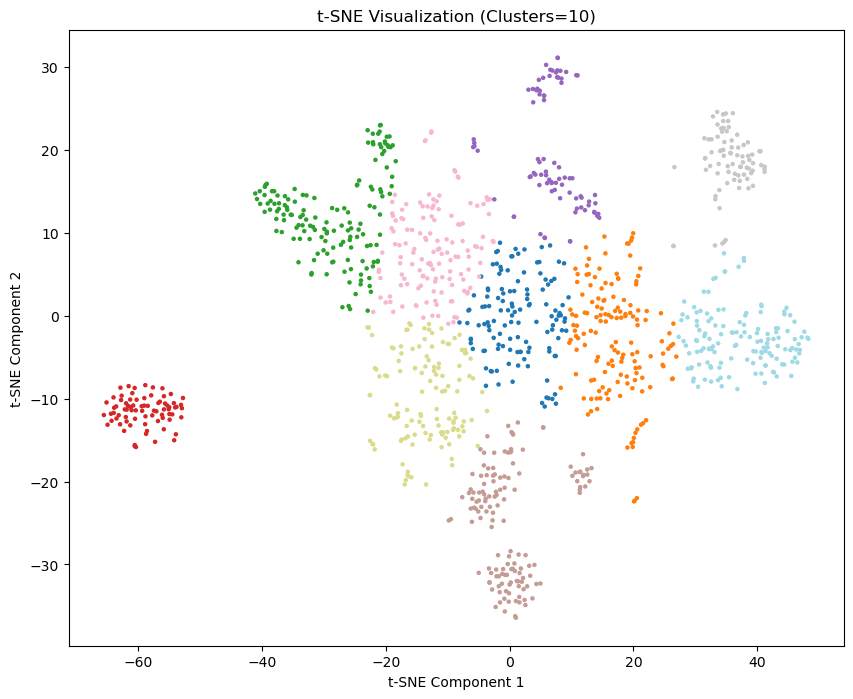

Adjusted Rand Index (ARI) for Clusters=10: 0.0003



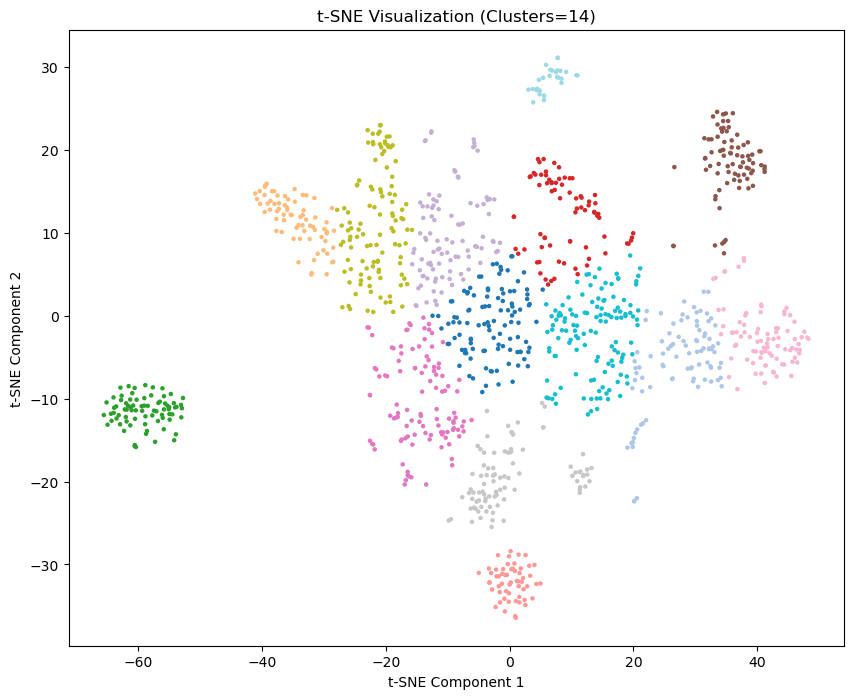

Adjusted Rand Index (ARI) for Clusters=14: -0.0013



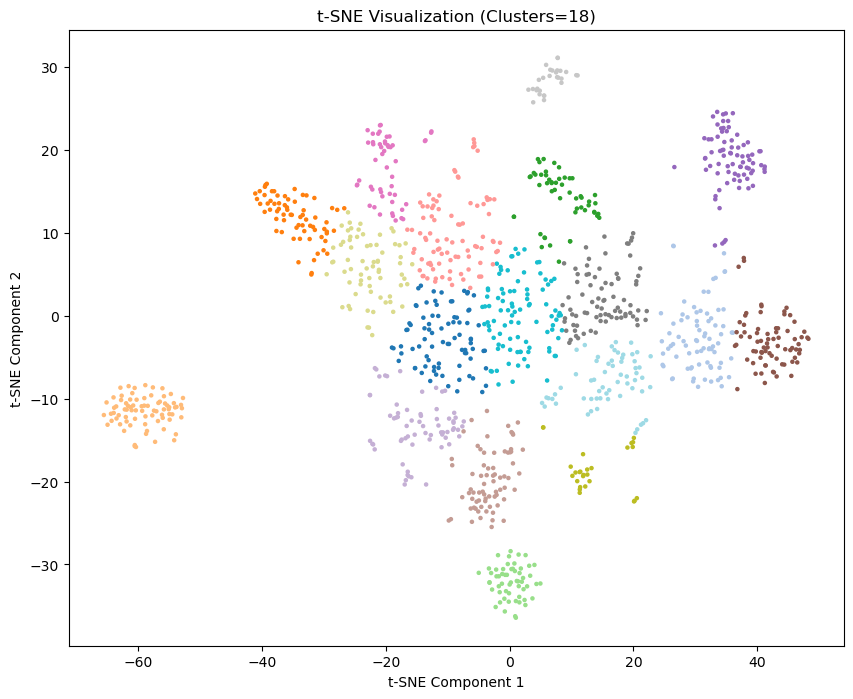

Adjusted Rand Index (ARI) for Clusters=18: 0.0016



In [10]:
# List of different numbers of clusters to try
num_clusters_list = [4, 7, 10, 14, 18]

# Change the random seed to see how much the algorithm depends on initialization conditions
random_seed = 123

# Call the function to perform k-means clustering and t-SNE for each number of clusters
kmeans_clustering_and_tsne(tsne_result, label_integers, num_clusters_list, random_seed)

Using the code above, you can try to explore how the **Adjusted Rand Index (ARI)** (using the primary cancer types as proxy of "true" groups to observe) changes with different number of clusters for the **K-means clustering** algorithm. How different it is compared to the hierarchical clustering?

You can also try different seeds to initialize the clustering algorithm at random. You will notice how dependent on the initial random conditions the algorithm is.